# Hierarchichal/K-Means Clustering, Logistic Regression 
University of Denver

Makarand Nadendla

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
%matplotlib inline

In [31]:
df_wine = pd.read_csv("winequality-white.csv", sep=";")

df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [32]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
df_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

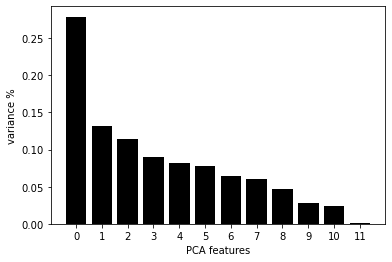

In [35]:
# Let's use the standard scaler

scaler = StandardScaler()

df_wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']] = scaler.fit_transform(df_wine)
pca = PCA()
comps = pd.DataFrame(pca.fit_transform(df_wine))

# plot 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [36]:
comps.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868,-0.891770,0.936900,-0.069991,-0.593900,-0.000135,0.044828,0.049619
1,-0.612800,0.289411,0.816434,0.848734,-0.527425,-0.466481,0.215699,0.452790,0.310059,-1.233989,-0.043194,0.141441
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209,-0.493458,0.184178,0.566042,1.113311,0.389581,-0.827464,-0.178330
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,0.363931,-0.040929
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039,0.768918,-0.084845,-0.167000,0.734498,-0.070781,0.363931,-0.040929


In [13]:
px.scatter_3d(comps, x=0, y=1, z=2)

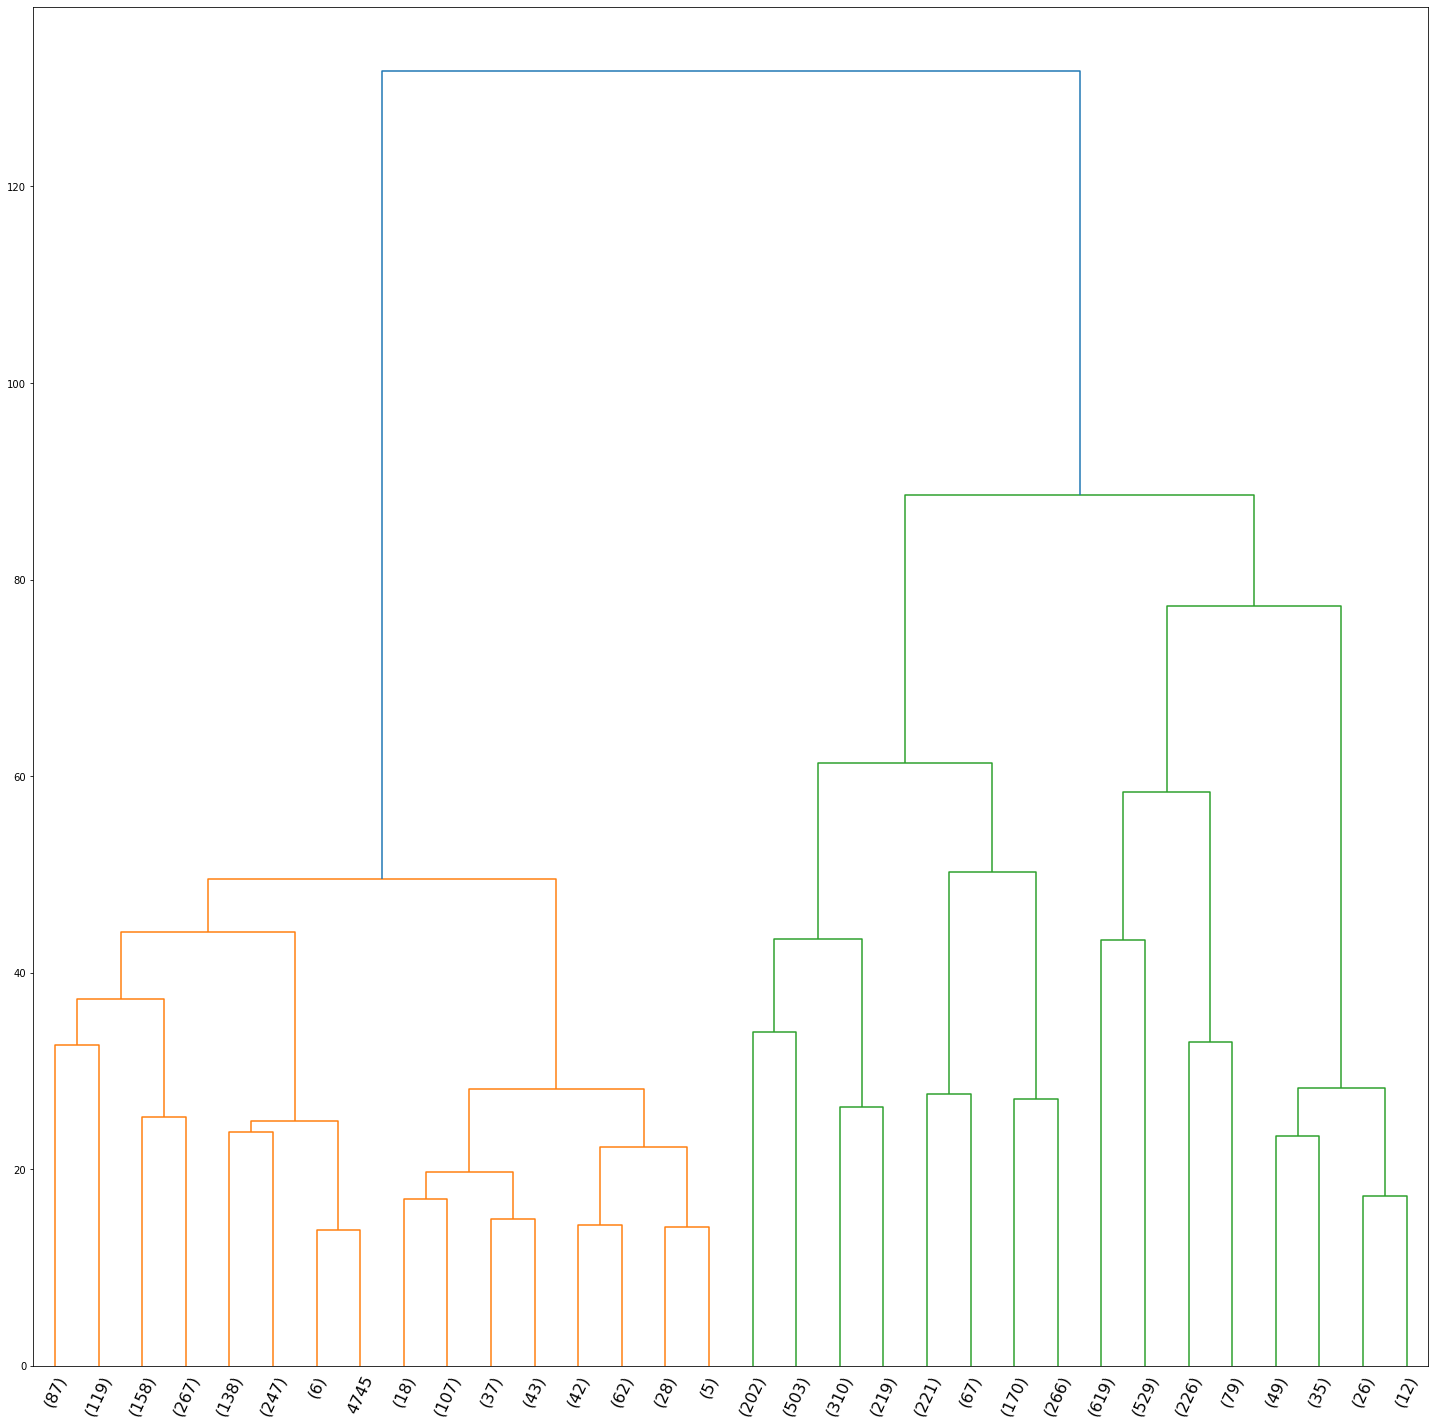

In [9]:
# hierarchichal clustering
fig, ax = plt.subplots(figsize = (25,25))
linkage_matrix = linkage(comps, method = 'ward', metric = 'euclidean', optimal_ordering=True)
dn = dendrogram(linkage_matrix,truncate_mode="level" ,leaf_font_size=16, leaf_rotation=65, p=4)
plt.rc('ytick', labelsize=12)
plt.show()

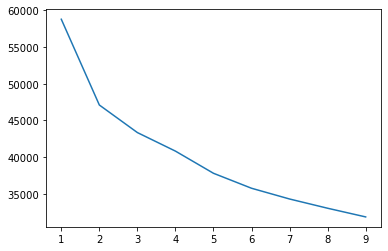

In [14]:
k_clusters = [i for i in range(1,10)]
SSE = []

for k in k_clusters:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(comps)
    SSE.append(kmeans.inertia_)

plt.plot(k_clusters, SSE)
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(comps)
y_kmeans

array([4, 3, 0, ..., 0, 1, 1])

In [37]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [41]:
df_wine["cluster_labels"] = y_kmeans

model = LogisticRegression()
model.fit(df_wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']],df_wine["cluster_labels"])

LogisticRegression()

In [44]:
param_grid = {"C":[i for i in np.arange(0, 1, 0.1)]}
cv_model = GridSearchCV(model, param_grid)
cv_model.fit(df_wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']],df_wine["cluster_labels"])
cv_model.best_params_

{'C': 0.9}

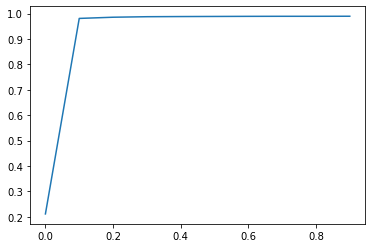

In [51]:
plt.plot([i for i in np.arange(0, 1, 0.1)],cv_model.cv_results_["mean_test_score"])

In [126]:
lr = SGDRegressor()
X_train = df_health[["age","income","illness","reduced"]] 
y = df_health["health"]
lr.fit(X_train, y)
lr.coef_

array([-0.17268687, -0.12051153,  0.68182303,  0.41663155])

In [7]:
df_heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# scaling 
scaler = StandardScaler()
df_heart[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]] = scaler.fit_transform(df_heart[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]])

feature_matrix = sm.add_constant(df_heart[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"]], prepend=False)
y = df_heart["DEATH_EVENT"].to_numpy()
# Fit and summarize OLS model
model = sm.Logit(y, feature_matrix)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Wed, 03 Mar 2021   Pseudo R-squ.:                  0.4151
Time:                        04:03:49   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.5631      0.188      3.001      0.003       0.195

In [11]:
df_heart[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]].corr()>0.2

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,True,False,False,False,False,False,False
creatinine_phosphokinase,False,True,False,False,False,False,False
ejection_fraction,False,False,True,False,False,False,False
platelets,False,False,False,True,False,False,False
serum_creatinine,False,False,False,False,True,False,False
serum_sodium,False,False,False,False,False,True,False
time,False,False,False,False,False,False,True


In [27]:
predictions = res.predict(feature_matrix)
predictions = predictions.apply(func = lambda x: int(x >= 0.5))

print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       214
           1       0.72      0.81      0.76        85

    accuracy                           0.86       299
   macro avg       0.82      0.84      0.83       299
weighted avg       0.86      0.86      0.86       299

